Checking if M507 works correctly

In [ ]:
#TODO check the TRS compass and consider to rotate

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from wind_tools import *  
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib
#matplotlib.use('Qt5Agg')

import matplotlib.pyplot as plt
sns.set()
import plotly.express as px

matplotlib.rcParams['figure.figsize'] = (16,10)

## Load data

In [ ]:
proc_dir = Path("2020_data/data_20200724_final_field_install/processed")

#default is 2 mins aggregated data
wm1_path = proc_dir / "eddypro_WM1_2min_full_output_2020-07-28T164232_exp.csv"
m7_path = proc_dir / "eddypro_TRS_m507_full_output_2020-07-29T075333_exp.csv"



cache_dir = Path("data_cache")
start_date = '2020-07-24 13:00:00'
end_date = '2020-07-28 15:00:00'

wind_cols = ['u_unrot','v_unrot', 'w_unrot', 'wind_speed', 'wind_dir']
wind_comp_rename = {'u_unrot': 'u', 'v_unrot': 'v', 'w_unrot': 'w'}

In [ ]:
wm1, m7= map(
    lambda p: load_ep_cache(p, cache_dir= cache_dir)
    .loc[start_date:end_date]
    .loc[:,wind_cols]
    .rename(columns=wind_comp_rename),
    [wm1_path, m7_path])

## Exploration plots

M507 is mounted horizontally so there the need of a series of transformation to convert from the tilted and rotated m507 reference system to the standard EP one

Here you can find the analisys made to understand the steps needed [tinkercad model](https://www.tinkercad.com/things/cZxrXNQUGYp-exquisite-blad/edit)
![screen](m506_axis_rotation_sketch.png)

Steps required:
1. invert u axis
2. rotate the u by -45° on the anemometer horizontal plane
3. remap axis   
    u = u  
    v = w   
    w = -v   
4. (optional) rotate taking into account the horizontal north offset (EP reference)

In [ ]:
def process_m507(data):
    # 1
    data[:, u] = -1 * data[:, u]
    # 2
    data[:, [u, v]] = rotate_ang(data[:, [u,v]], 45)
    # 3
    data[:, v] = data[:, w]
    data[:, w] = -1 * data[:, v]
    
    return data

In [ ]:
wm1.wind_speed.plot()
m7.wind_speed.plot()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:xlabel='date_time'>

In [ ]:
wm1.wind_speed.isna().argmax()

1519

In [ ]:
# fill NaN value on the 26th at 15:40
wm1 = wm1.interpolate()

In [ ]:
plot_components_scatter([wm1, m7], ('wind_speed',))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
plot_dist_comp(wm1)
plot_dist_comp(m7)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:ylabel='Frequency'>

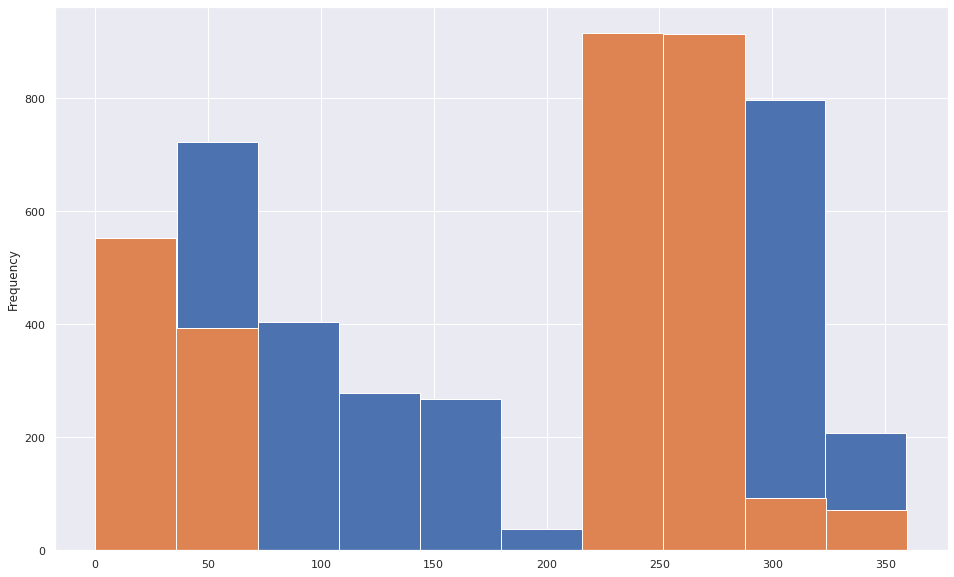

In [ ]:
wm1.wind_dir.plot.hist()
m7.wind_dir.plot.hist()

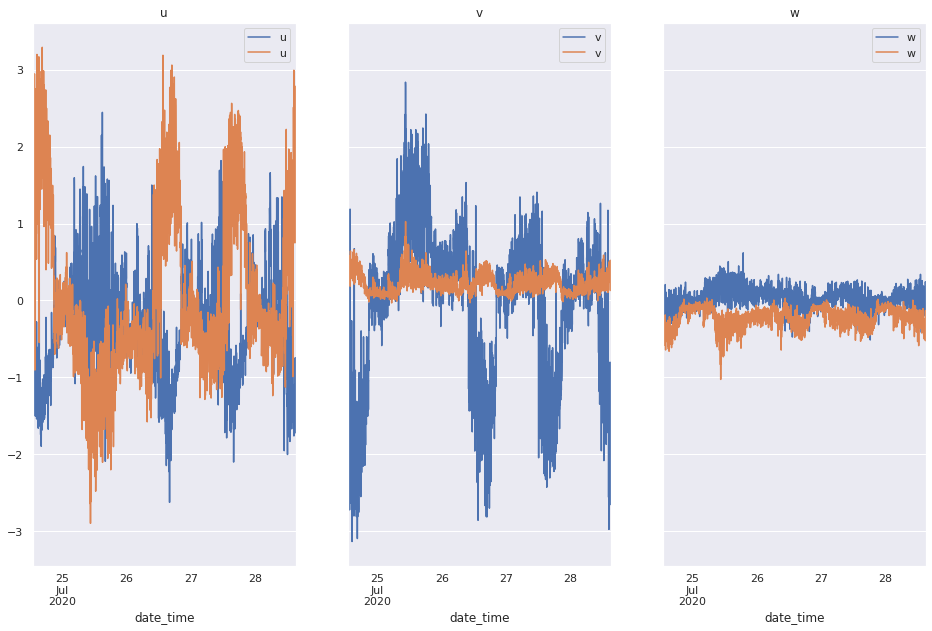

In [ ]:
plot_components([wm1, m7])

In [ ]:
m7i = m7
m7i.u = -m7i.u
m7i.w = -m7i.w

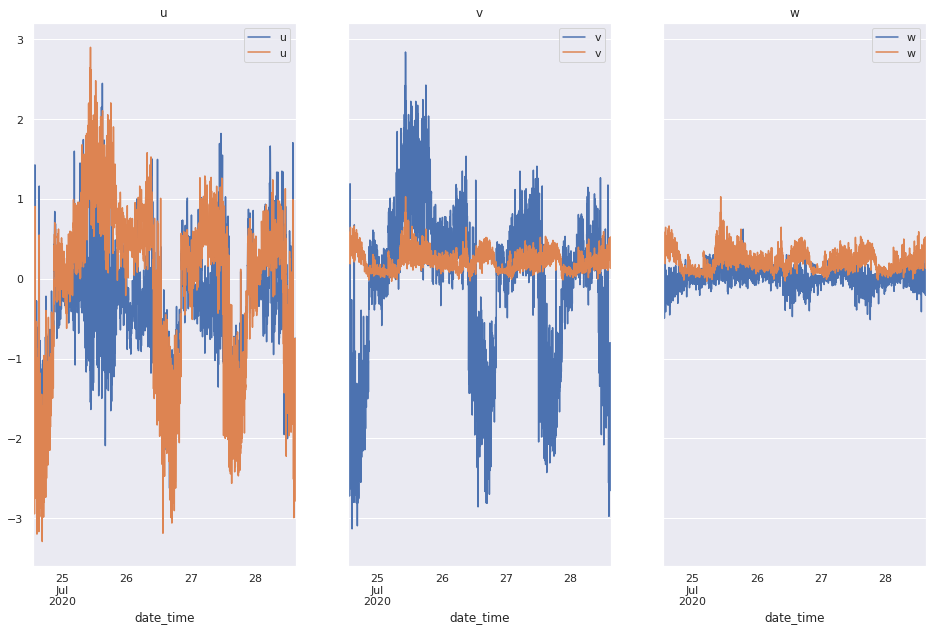

In [ ]:
plot_components([wm1, m7i])

## filter by wind_dir

In [ ]:
filt = filter_by_wind_dir(wm1, 230, 30)

In [ ]:
wm1.index

DatetimeIndex(['2020-07-24 13:02:00', '2020-07-24 13:04:00',
               '2020-07-24 13:06:00', '2020-07-24 13:08:00',
               '2020-07-24 13:10:00', '2020-07-24 13:12:00',
               '2020-07-24 13:14:00', '2020-07-24 13:16:00',
               '2020-07-24 13:18:00', '2020-07-24 13:20:00',
               ...
               '2020-07-28 14:42:00', '2020-07-28 14:44:00',
               '2020-07-28 14:46:00', '2020-07-28 14:48:00',
               '2020-07-28 14:50:00', '2020-07-28 14:52:00',
               '2020-07-28 14:54:00', '2020-07-28 14:56:00',
               '2020-07-28 14:58:00', '2020-07-28 15:00:00'],
              dtype='datetime64[ns]', name='date_time', length=2940, freq=None)

In [ ]:
wm1f = wm1[filt]
m7f = m7[filt]

/home/simone/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning:


The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.

/home/simone/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning:


The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.



<AxesSubplot:xlabel='date_time'>

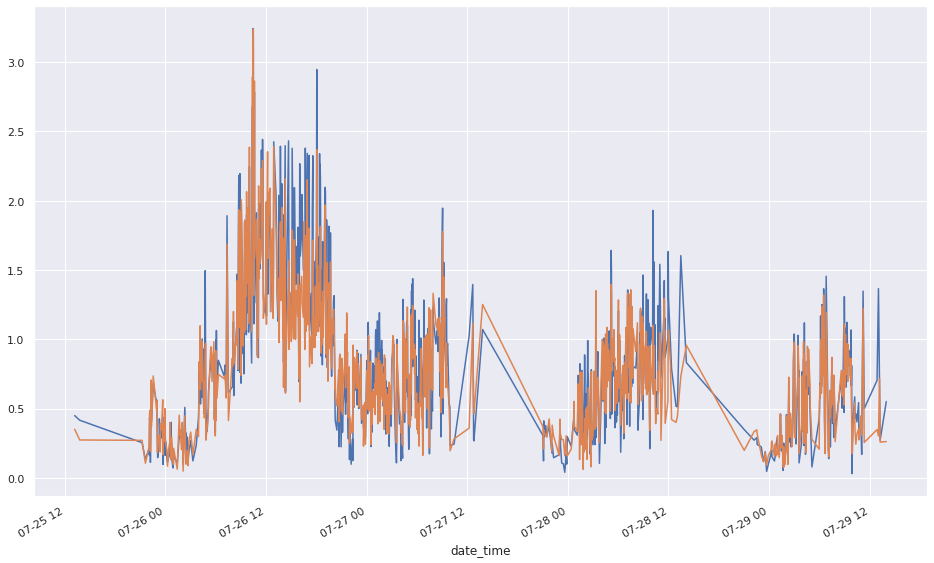

In [ ]:
wm1f.wind_speed.plot()
m7f.wind_speed.plot()

/home/simone/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning:


The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.

/home/simone/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning:


The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.



<AxesSubplot:xlabel='date_time'>

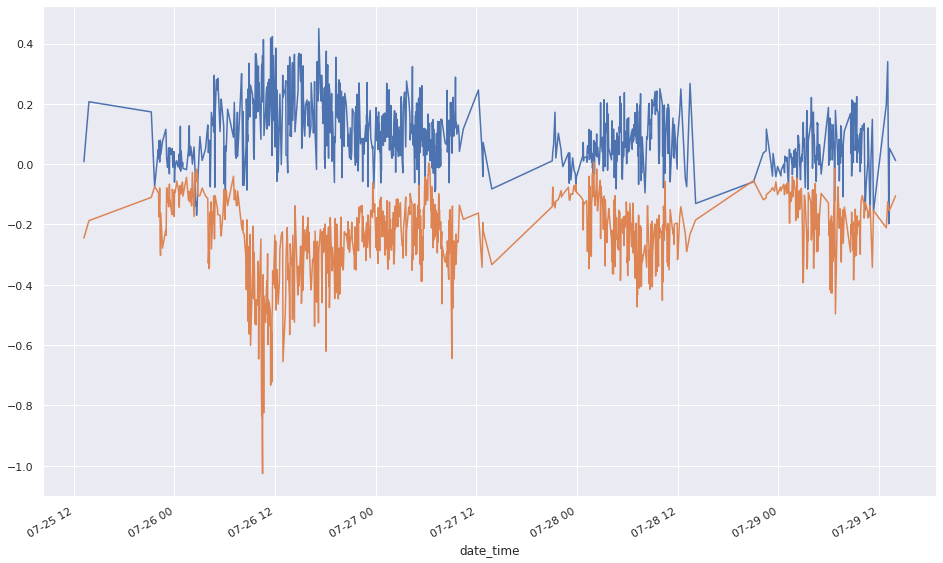

In [ ]:
wm1f.w.plot()
m7f.w.plot()